<a href="https://colab.research.google.com/github/pablocelva/challenge-telecom-x-parte-2/blob/main/TelecomX_LATAM_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Telecom X Latam (parte 2)

🧠 Objetivos del Desafío

- Preparar los datos para el modelado (tratamiento, codificación, normalización).

- Realizar análisis de correlación y selección de variables.

-  Entrenar dos o más modelos de clasificación.

- Evaluar el rendimiento de los modelos con métricas.

- Interpretar los resultados, incluyendo la importancia de las variables.

-  Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

#🛠️ Preparación de los Datos

##1. Extracción de datos tratados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/pablocelva/challenge-telecom-x-parte-2/refs/heads/main/datos_tratados.csv'
datos = pd.read_csv(url)
datos.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Cuenta_Mensual,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias,Total_Internet_Services
906,1,Male,1,0,0,12,Month-to-month,1,Electronic check,43.65,...,0,DSL,0,0,1,1,0,1,1.455000,3
605,1,Female,0,0,0,34,One year,1,Mailed check,64.40,...,1,DSL,1,1,0,1,0,0,2.146667,3
5614,1,Female,0,0,0,1,Month-to-month,1,Electronic check,69.60,...,0,Fiber optic,0,0,0,0,0,0,2.320000,0
4604,1,Female,0,0,0,29,Month-to-month,1,Electronic check,78.90,...,0,Fiber optic,0,0,0,0,1,0,2.630000,1
1120,1,Male,0,0,0,1,Month-to-month,0,Mailed check,60.10,...,1,DSL,0,1,0,1,0,0,2.003333,2


## 2. Eliminar columnas no relevantes

In [3]:
df = datos.drop(['Cuentas_Diarias', 'Total_Internet_Services'], axis=1)
df.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Cuenta_Mensual,Cuenta_Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5837,0,Female,0,0,0,36,Month-to-month,1,Credit card (automatic),94.80,3565.65,1,0,Fiber optic,0,1,0,0,1,1
5551,0,Female,0,1,1,62,Two year,0,Bank transfer (automatic),48.70,3008.55,0,0,DSL,1,1,0,1,1,0
4445,0,Female,0,0,0,68,One year,1,Credit card (automatic),54.45,3674.95,1,0,DSL,1,0,1,0,0,0
6278,1,Male,0,0,0,69,One year,1,Bank transfer (automatic),104.70,7220.35,1,1,Fiber optic,0,1,0,1,1,1
5747,0,Male,0,0,0,1,Month-to-month,1,Credit card (automatic),19.75,19.75,1,0,No,0,0,0,0,0,0


##3. Encoding

In [4]:
#columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns
#print(f"Categorical columns to encode: {list(columnas_categoricas)}")

#df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

#df_encoded.sample(5)

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [6]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [7]:
X.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Cuenta_Mensual,Cuenta_Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4217,Female,0,1,0,68,Two year,1,Bank transfer (automatic),110.8,7553.60,1,1,Fiber optic,1,1,1,0,1,1
6571,Male,0,0,0,3,Month-to-month,1,Mailed check,19.1,53.05,1,0,No,0,0,0,0,0,0
6600,Male,0,1,1,62,Two year,0,Electronic check,86.1,5215.25,1,0,DSL,1,1,1,1,1,1
5329,Male,0,0,0,13,Two year,0,Credit card (automatic),20.0,268.45,1,0,No,0,0,0,0,0,0
1065,Male,0,1,1,53,Month-to-month,0,Electronic check,85.7,4616.10,1,1,DSL,1,0,1,1,1,1


In [8]:
y.sample(5)

,Churn
2449,0
1534,1
1064,0
6957,1
2472,0


In [9]:
columnas = X.columns

In [10]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['Contract','PaymentMethod', 'InternetService', 'gender']),
    remainder='passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False
)

In [11]:
X = one_hot.fit_transform(X)

In [12]:
one_hot.get_feature_names_out()

array(['onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year',
       'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__gender_Male',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure',
       'remainder__PaperlessBilling', 'remainder__Cuenta_Mensual',
       'remainder__Cuenta_Total', 'remainder__PhoneService',
       'remainder__MultipleLines', 'remainder__OnlineSecurity',
       'remainder__OnlineBackup', 'remainder__DeviceProtection',
       'remainder__TechSupport', 'remainder__StreamingTV',
       'remainder__StreamingMov

In [13]:
X

array([[0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 1.]])

In [14]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out())

,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,remainder__Cuenta_Mensual,remainder__Cuenta_Total,remainder__PhoneService,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,65.60,593.30,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,59.90,542.40,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,73.90,280.85,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,98.00,1237.85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,83.90,267.40,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,55.15,742.90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7263,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,85.10,1873.70,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7264,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,50.30,92.75,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7265,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,67.85,4627.65,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [15]:
df_encoded = pd.DataFrame(X, columns=one_hot.get_feature_names_out())
df_encoded.sample(5)

,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,remainder__Cuenta_Mensual,remainder__Cuenta_Total,remainder__PhoneService,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies
168,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,100.70,1522.70,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3109,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,59.30,2209.15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3248,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,25.15,1509.90,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5693,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,75.15,3480.35,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
3661,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,45.00,1228.65,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


##4. Verificación de la Proporción de Cancelación (Churn)

In [16]:
cuenta_churn = df['Churn'].value_counts()
print("Distribución de la variable 'Churn':", cuenta_churn)

Distribución de la variable 'Churn': Churn
0    5398
1    1869
Name: count, dtype: int64


In [17]:
proporcion_churn = df['Churn'].value_counts(normalize=True)
print("\nProporción de la variable 'Churn':", proporcion_churn)


Proporción de la variable 'Churn': Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


In [18]:
proporcion_clase_min = proporcion_churn.min()

if proporcion_clase_min < 0.25:
    print("\nExiste un posible desbalance de clases en la variable 'Churn'.")
else:
    print("\nNo parece haber un desbalance significativo de clases en la variable 'Churn'.")


No parece haber un desbalance significativo de clases en la variable 'Churn'.


##5. Balanceo de Clases

In [19]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)
#X_balanced, y_balanced = smote.fit_resample(df_encoded, y)
#print("Distribución de la variable 'Churn' después de aplicar SMOTE:", y_balanced.value_counts())

## 5.2 Manejo de Valores Faltantes (Imputación)

Aplicaremos imputación para llenar los valores faltantes antes de dividir los datos.

In [20]:
from sklearn.impute import SimpleImputer

print("Valores faltantes por columna en df_encoded antes de la imputación:")
print(df_encoded.isnull().sum())

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_encoded)

df_encoded_imputed = pd.DataFrame(X_imputed, columns=df_encoded.columns, index=df_encoded.index)

print("\nValores faltantes por columna en df_encoded después de la imputación:")
print(df_encoded_imputed.isnull().sum())

Valores faltantes por columna en df_encoded antes de la imputación:
onehotencoder__Contract_Month-to-month                     0
onehotencoder__Contract_One year                           0
onehotencoder__Contract_Two year                           0
onehotencoder__PaymentMethod_Bank transfer (automatic)     0
onehotencoder__PaymentMethod_Credit card (automatic)       0
onehotencoder__PaymentMethod_Electronic check              0
onehotencoder__PaymentMethod_Mailed check                  0
onehotencoder__InternetService_DSL                         0
onehotencoder__InternetService_Fiber optic                 0
onehotencoder__InternetService_No                          0
onehotencoder__gender_Male                                 0
remainder__SeniorCitizen                                   0
remainder__Partner                                         0
remainder__Dependents                                      0
remainder__tenure                                          0
remainder__Paperl

##6. Normalización o Estandarización

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
columnas_numericas = [col for col in df_encoded_imputed.columns if col.startswith('remainder__')]
scaler = StandardScaler()

df_scaled = df_encoded_imputed.copy()
df_scaled[columnas_numericas] = scaler.fit_transform(df_scaled[columnas_numericas])
df_scaled.sample(5)

,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,remainder__Cuenta_Mensual,remainder__Cuenta_Total,remainder__PhoneService,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies
5768,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-1.487681,-0.997342,0.328290,-0.854058,-0.632821,-0.725065,-0.722195,-0.638369,-0.789421,-0.795404
2327,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.183550,-0.975130,0.328290,-0.854058,-0.632821,-0.725065,-0.722195,-0.638369,-0.789421,-0.795404
1663,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.953285,-0.396043,-3.046086,-0.854058,-0.632821,1.379187,-0.722195,1.566492,-0.789421,-0.795404
1806,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.142060,-0.782498,0.328290,-0.854058,-0.632821,-0.725065,-0.722195,-0.638369,-0.789421,-0.795404
2021,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.297151,0.525052,0.328290,1.170881,1.580225,1.379187,-0.722195,-0.638369,1.266752,1.257223


#🎯 Correlación y Selección de Variables

##1. Análisis de Correlación

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

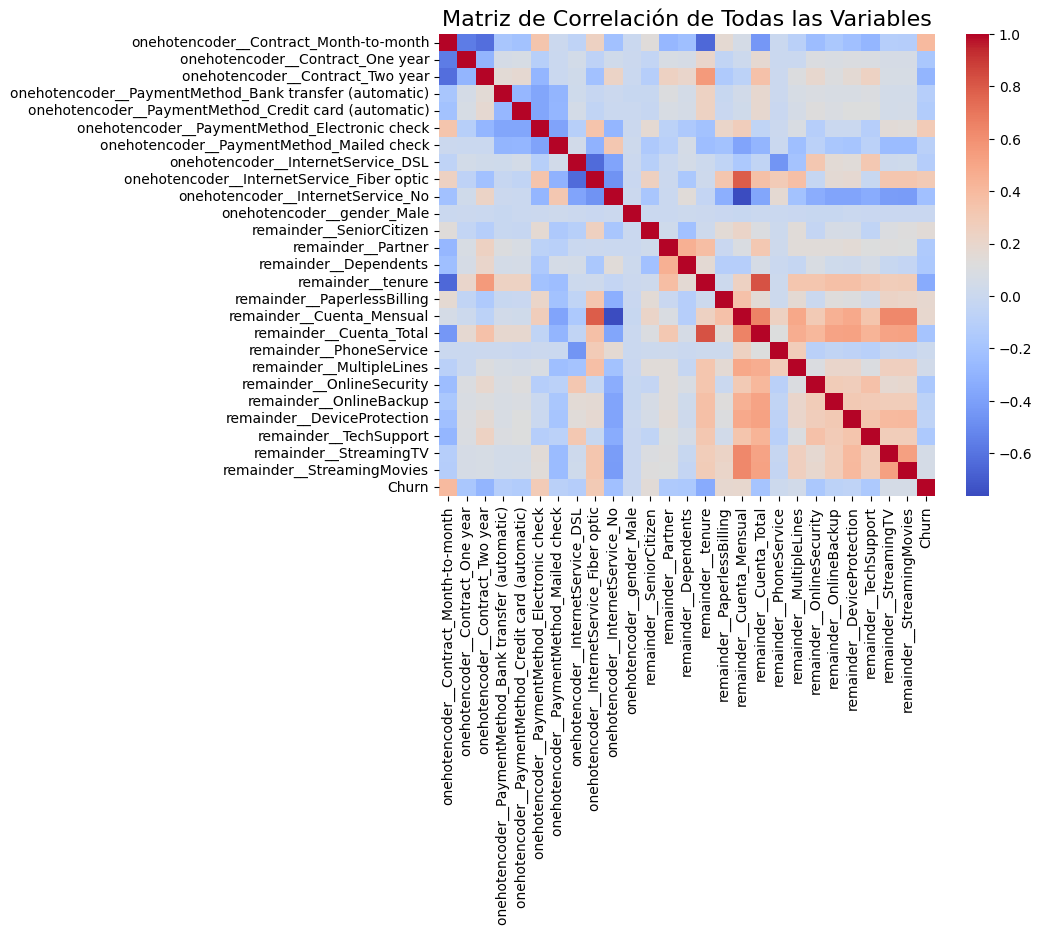

In [24]:
df_corr = df_scaled.copy()
df_corr['Churn'] = y.values

matriz_corr = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, cmap='coolwarm')
plt.title('Matriz de Correlación de Todas las Variables', fontsize=16)
plt.show()

In [25]:
print("\nCorrelación con la variable objetivo 'Churn':", matriz_corr['Churn'].sort_values(ascending=False))


Correlación con la variable objetivo 'Churn': Churn                                                     1.000000
onehotencoder__Contract_Month-to-month                    0.395584
onehotencoder__InternetService_Fiber optic                0.300949
onehotencoder__PaymentMethod_Electronic check             0.294626
remainder__Cuenta_Mensual                                 0.189866
remainder__PaperlessBilling                               0.186666
remainder__SeniorCitizen                                  0.146733
remainder__StreamingTV                                    0.062430
remainder__StreamingMovies                                0.060586
remainder__MultipleLines                                  0.039343
remainder__PhoneService                                   0.012571
onehotencoder__gender_Male                               -0.009555
remainder__DeviceProtection                              -0.063452
remainder__OnlineBackup                                  -0.080163
onehotencoder__

##2. Análisis Dirigido

In [26]:
df_viz = df.copy()
df_viz['Churn'] = y.values
df_viz['Churn'] = df_viz['Churn'].map({0: 'No Churn', 1: 'Churn'})

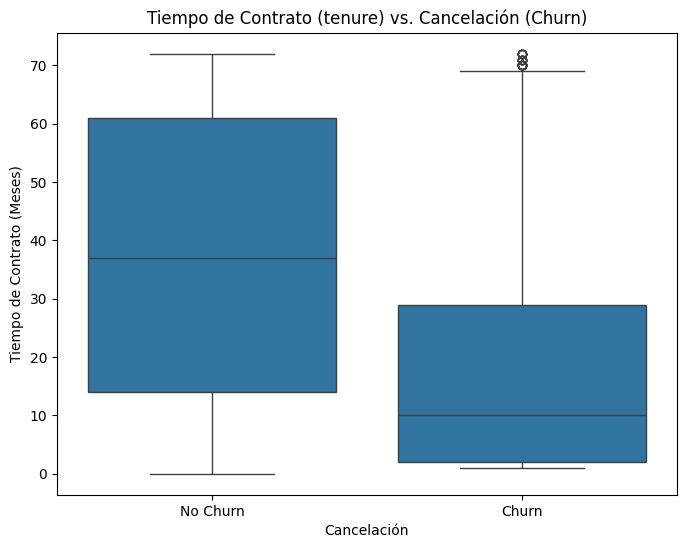

In [27]:
# --- Tiempo de Contrato (tenure) vs. Cancelación (Churn) ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_viz)
plt.title('Tiempo de Contrato (tenure) vs. Cancelación (Churn)')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de Contrato (Meses)')
plt.show()

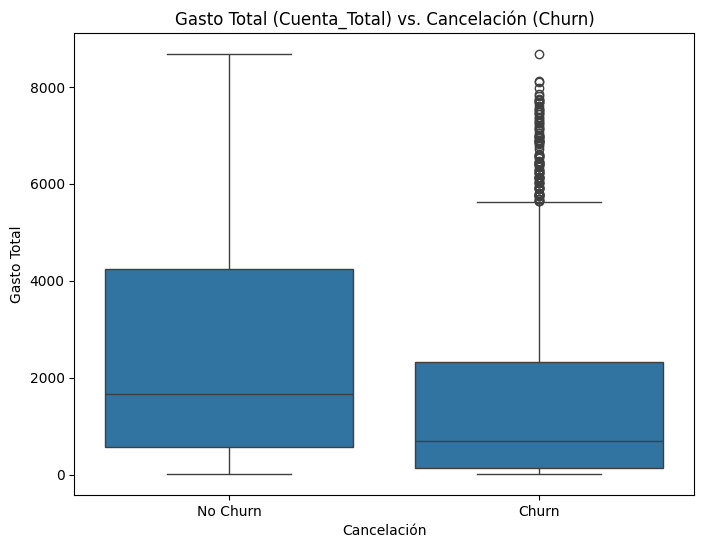

In [28]:
# --- Gasto Total (Cuenta_Total) vs. Cancelación (Churn) ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Cuenta_Total', data=df_viz)
plt.title('Gasto Total (Cuenta_Total) vs. Cancelación (Churn)')
plt.xlabel('Cancelación')
plt.ylabel('Gasto Total')
plt.show()

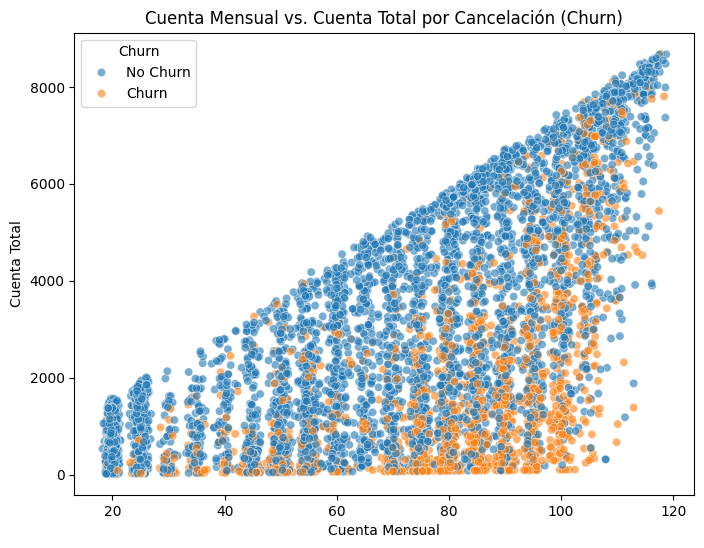

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cuenta_Mensual', y='Cuenta_Total', hue='Churn', data=df_viz, alpha=0.6)
plt.title('Cuenta Mensual vs. Cuenta Total por Cancelación (Churn)')
plt.xlabel('Cuenta Mensual')
plt.ylabel('Cuenta Total')
plt.show()

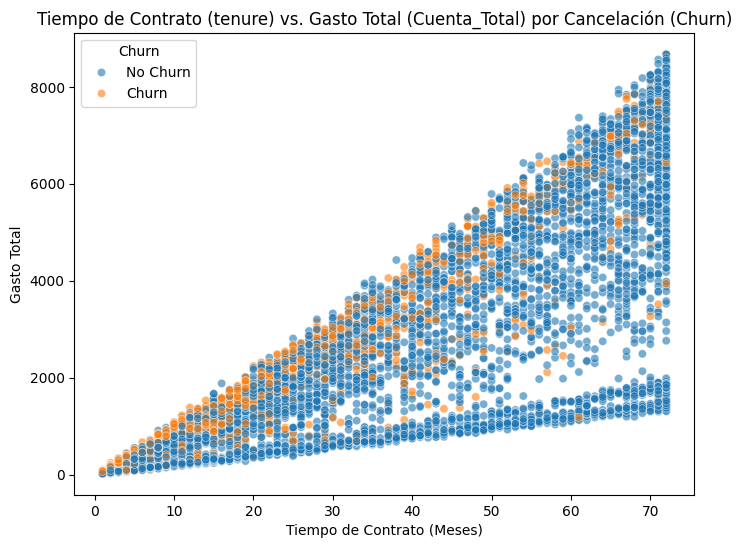

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='Cuenta_Total', hue='Churn', data=df_viz, alpha=0.6)
plt.title('Tiempo de Contrato (tenure) vs. Gasto Total (Cuenta_Total) por Cancelación (Churn)')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Gasto Total')
plt.show()

#🤖 Modelado Predictivo

##1. Separación de Datos

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (5813, 26)
Forma de X_test: (1454, 26)
Forma de y_train: (5813,)
Forma de y_test: (1454,)


In [33]:
print("\nDistribución de Churn en y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribución de Churn en y_test:")
print(y_test.value_counts(normalize=True))


Distribución de Churn en y_train:
Churn
0    0.742818
1    0.257182
Name: proportion, dtype: float64

Distribución de Churn en y_test:
Churn
0    0.742779
1    0.257221
Name: proportion, dtype: float64


##2. Creación de Modelos

Entrenaremos dos modelos de clasificación: Regresión Logística (sensible a la escala) y Random Forest (no sensible a la escala).

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
modelo_random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
print("\nEntrenando modelo de Random Forest...")
modelo_random_forest.fit(X_train, y_train)
print("Entrenamiento de Random Forest completado.")


Entrenando modelo de Random Forest...
Entrenamiento de Random Forest completado.


In [36]:
y_pred_random_forest = modelo_random_forest.predict(X_test)

In [37]:
modelo_knn = KNeighborsClassifier(n_neighbors=5)
print("Entrenando modelo de K-Nearest Neighbors (KNN)...")
modelo_knn.fit(X_train, y_train)
print("Entrenamiento de KNN completado.")

Entrenando modelo de K-Nearest Neighbors (KNN)...
Entrenamiento de KNN completado.


In [38]:
y_pred_knn = modelo_knn.predict(X_test)

##3. Evaluación de los Modelos

#📋 Interpretación y Conclusiones

##1. Análisis de la Importancia de las Variables

##2. Conclusión